In [1]:
import pandas as pd

In [2]:
#Załadowanie danych z podanego pliku

In [3]:
pd.read_csv('BCL_TaskCreation.csv')

,dataStream;rowCount;probingTimestamp
0,BCL_TaskCreation;315349655;2020-01-13 09:33:00...
1,BCL_TaskCreation;315349655;2020-01-13 09:34:00...
2,BCL_TaskCreation;314533770;2020-01-11 01:18:00...
3,BCL_TaskCreation;289249872;2020-04-05 16:10:00...
4,BCL_TaskCreation;289249872;2020-04-05 16:11:00...
...,...
160730,BCL_TaskCreation;289702842;2020-05-02 04:43:00...
160731,BCL_TaskCreation;289702943;2020-05-02 07:26:01...
160732,BCL_TaskCreation;289702883;2020-05-02 06:10:00...
160733,BCL_TaskCreation;289702842;2020-05-02 04:18:00...


# Problem 1 - dane nie są rozdzielone przecinkiem, należy wprowadzić dodatkowy parametr

In [4]:
pd.read_csv('BCL_TaskCreation.csv', delimiter = ';')

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883
...,...,...,...
160730,BCL_TaskCreation,289702842,2020-05-02 04:43:00.767
160731,BCL_TaskCreation,289702943,2020-05-02 07:26:01.040
160732,BCL_TaskCreation,289702883,2020-05-02 06:10:00.157
160733,BCL_TaskCreation,289702842,2020-05-02 04:18:00.117


In [5]:
#Sprawdzenie podstawowych informacji o danych oraz o wykorzystaniu pamięci

In [6]:
pd.read_csv('BCL_TaskCreation.csv', delimiter = ';').info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dataStream        160735 non-null  object
 1   rowCount          160735 non-null  int64 
 2   probingTimestamp  160735 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.7 MB


# Problem 2 - nieprawidłowy typ danych dla daty 

In [7]:
pd.read_csv('BCL_TaskCreation.csv', delimiter = ';', parse_dates = ['probingTimestamp']).info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   dataStream        160735 non-null  object        
 1   rowCount          160735 non-null  int64         
 2   probingTimestamp  160735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.6 MB


In [8]:
# Dzięki zmianie typu danych, zużycie pamięci zmniejszyło się o 45%

In [9]:
# Dane zostały poprawnie załadowane, można przypisać je do zmiennej

In [10]:
df = pd.read_csv('BCL_TaskCreation.csv', delimiter = ';',parse_dates = ['probingTimestamp'])

In [11]:
# Sprawdzenie liczby unikalnych wartości w kolumnach dataStream oraz rowCount w celu możliwej zmiany typu danych z object na category

In [12]:
df.dtypes

dataStream                  object
rowCount                     int64
probingTimestamp    datetime64[ns]
dtype: object

In [13]:
df['dataStream'].nunique()

1

# Problem 3 - wartość w kolumnie dataStream jest jednakowa dla wszystkich wierszy. W celu dalszej optymalizacji kolumna zostanie usunięta

In [14]:
df.drop(columns = ['dataStream'], inplace = True)

In [15]:
df['rowCount'].nunique()

6612

In [16]:
# Typ danych kolumny rowCount może być zmieniony na cateogry

In [17]:
df['rowCount'] = df['rowCount'].astype('category')

In [18]:
# Ponowne wyświetlenie informacji o danych

In [19]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   rowCount          160735 non-null  category      
 1   probingTimestamp  160735 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1)
memory usage: 1.8 MB


In [20]:
# Zużycie danych zostało zmniejszone o 93% względem początkowego stanu

In [21]:
# Sprawdzenie czy w danych występują wartości Nan

In [22]:
df.isna().sum()

rowCount            0
probingTimestamp    0
dtype: int64

In [23]:
# Sprawdzenie czy w danych wsystępują duplikaty

In [24]:
df[df.duplicated(keep = False)]

,rowCount,probingTimestamp
8437,317582568,2020-01-16 11:19:00.257
8588,317606524,2020-01-16 12:26:01.040
8733,317606524,2020-01-16 12:26:01.040
8947,317582568,2020-01-16 11:19:00.257
18529,320921727,2020-01-23 13:08:01.017
...,...,...
157590,289695919,2020-04-30 12:01:00.320
157612,289694331,2020-04-30 00:01:00.480
157947,289695919,2020-04-30 12:01:00.320
160143,289702842,2020-05-02 04:02:00.040


# Problem 4 - w danych znajdują się zduplikowane wiersze, które zostaną usunięte

In [25]:
df.drop_duplicates(keep = 'first', inplace = True)

In [26]:
df

,rowCount,probingTimestamp
0,315349655,2020-01-13 09:33:00.497
1,315349655,2020-01-13 09:34:00.157
2,314533770,2020-01-11 01:18:00.143
3,289249872,2020-04-05 16:10:00.333
4,289249872,2020-04-05 16:11:00.883
...,...,...
160730,289702842,2020-05-02 04:43:00.767
160731,289702943,2020-05-02 07:26:01.040
160732,289702883,2020-05-02 06:10:00.157
160733,289702842,2020-05-02 04:18:00.117


In [27]:
# Sortowanie danych w celu zidentyfikowania ciągłości

In [28]:
df.sort_values(by = ['rowCount', 'probingTimestamp'])

,rowCount,probingTimestamp
84761,283240055,2020-03-09 13:38:00.147
84762,283240055,2020-03-09 13:39:00.717
84758,283240055,2020-03-09 13:40:00.290
84763,283240055,2020-03-09 13:41:00.883
84764,283240055,2020-03-09 13:42:00.353
...,...,...
80386,338841446,2020-03-06 09:54:00.550
80400,338841446,2020-03-06 09:55:00.043
80401,338841446,2020-03-06 09:56:00.573
80402,338841446,2020-03-06 09:57:00.040


In [29]:
df.sort_values(by = ['probingTimestamp', 'rowCount'])

,rowCount,probingTimestamp
3506,314015548,2020-01-10 10:04:18.837
3505,314015548,2020-01-10 10:16:29.063
3507,314015548,2020-01-10 10:17:00.510
3512,314015548,2020-01-10 10:18:00.977
3513,314015548,2020-01-10 10:19:00.610
...,...,...
160365,289702943,2020-05-02 07:56:00.117
160366,289702943,2020-05-02 07:57:00.537
160369,289702943,2020-05-02 07:58:00.083
160373,289702943,2020-05-02 07:59:00.543


In [30]:
#Ponowne wczytanie bazy, usunięcie duplikatów oraz usunięcie kolumny 'dataStream'

In [31]:
df2 = pd.read_csv("BCL_TaskCreation.csv", delimiter=";")
df2.drop_duplicates(keep = 'first', inplace = True)
df2.drop(columns = ['dataStream'], inplace = True)

In [32]:
#Zmiana formatu i typu kolumny 'probingTimestamp' maksymalnie do godziny w celu identyfikacji zależności między nimi

In [33]:
df2['probingTimestamp']=pd.to_datetime(df2['probingTimestamp'].astype(str), format='%Y/%m/%d %H')
df2['probingTimestamp'] = df2['probingTimestamp'].dt.strftime('%Y/%m/%d %H')
df2 = df2.sort_values('probingTimestamp')
df2

,rowCount,probingTimestamp
3842,314015548,2020/01/10 10
3478,314015548,2020/01/10 10
3697,314015548,2020/01/10 10
3698,314015548,2020/01/10 10
3710,314015548,2020/01/10 10
...,...,...
160593,289702943,2020/05/02 07
160493,289702943,2020/05/02 07
159816,289702943,2020/05/02 07
160692,289702943,2020/05/02 07


In [34]:
#Stworzenie funkcji w celu wyświetlenia powtarzalności numerów 'rowCount' w ciągu jednej godziny

In [35]:
def rowCount_segmentation_per_hour():
    import matplotlib.pyplot as plt
    all_rowCount = df2.value_counts().count()
    rowCount1 = df2.value_counts().loc[lambda x : x==60].count()
    rowCount2 = df2.value_counts().loc[lambda x : x==59].count()
    rowCount3 = df2.value_counts().loc[lambda x : x==58].count()
    rowCount4 = df2.value_counts().loc[lambda x : x==57].count()
    rowCount5 = df2.value_counts().loc[lambda x : (x>1, x<57)].count()
    rowCount6 = df2.value_counts().loc[lambda x : x==1].count()
    rowCount7 = df2.value_counts().loc[lambda x : x>60].count()
    other = rowCount1 + rowCount3 + rowCount5
    
    print("\nIlość numerów 'rowCount' występujących w ciągu jednej godziny 60 razy: " + str(rowCount1) +
          "\nIlość numerów 'rowCount' występujących w ciągu jednej godziny 59 razy: " + str(rowCount2) +
          "\nIlość numerów 'rowCount' występujących w ciągu jednej godziny 58 razy: " + str(rowCount3) +
          "\nIlość numerów 'rowCount' występujących w ciągu jednej godziny 57 razy: " + str(rowCount4) +
          "\nIlość numerów 'rowCount' występujących w ciągu jednej godziny w przedziale (1-57): " + str(rowCount5) +
          "\nIlość numerów 'rowCount' występujacych w ciągu jednej godziny tylko raz: " + str(rowCount6) +
          "\nIlość numerów 'rowCount' występujacych w ciągu jednej godziny więcej niż 60 razy: " + str(rowCount7))
    
    lb1 = round(rowCount2 / all_rowCount * 100, 2)
    lb2 = round(rowCount4 / all_rowCount * 100, 2)
    lb3 = round(rowCount6 / all_rowCount * 100, 2)
    lb4 = round(other / all_rowCount * 100, 2)
    
    
    labels = [str(lb1) + "%",str(lb2) + "%",str(lb3) + "%",str(lb4)]
    values = [rowCount2, rowCount4, rowCount6, other]
    plt.pie(values, labels=labels, shadow = True, explode = (0.1, 0.1, 0.1, 0.1))
    plt.legend(['59','57','1','other'], loc='lower center', fontsize='small')
    plt.show()

In [36]:
#Największa ilość numerów 'rowCount' występuje w ciągu jednej godziny tylko raz (67.42%)
#Nie ma ani jednego przypadku dla wystąpienia powyżej 60 razy


Ilość numerów 'rowCount' występujących w ciągu jednej godziny 60 razy: 172
Ilość numerów 'rowCount' występujących w ciągu jednej godziny 59 razy: 1053
Ilość numerów 'rowCount' występujących w ciągu jednej godziny 58 razy: 74
Ilość numerów 'rowCount' występujących w ciągu jednej godziny 57 razy: 1117
Ilość numerów 'rowCount' występujących w ciągu jednej godziny w przedziale (1-57): 603
Ilość numerów 'rowCount' występujacych w ciągu jednej godziny tylko raz: 6247
Ilość numerów 'rowCount' występujacych w ciągu jednej godziny więcej niż 60 razy: 0


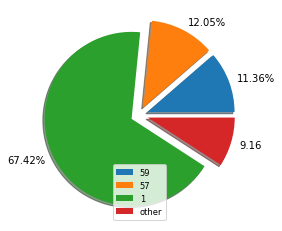

In [37]:
rowCount_segmentation_per_hour()

In [38]:
#Niżej wymienione przykłady pokazują zależność między następnymi godzinami
#Wyszukanie wszystkich wartości 'rowCount' zawierających wskazaną datę i godzinę

In [39]:
day=df2.loc[df2['probingTimestamp'] == ('2020/01/12 00')]
day.value_counts()

rowCount   probingTimestamp
314880353  2020/01/12 00       57
314867782  2020/01/12 00        1
314877782  2020/01/12 00        1
314879835  2020/01/12 00        1
dtype: int64

In [40]:
day=df2.loc[df2['probingTimestamp'] == ('2020/01/12 01')]
day.value_counts()

rowCount   probingTimestamp
314891383  2020/01/12 01       57
314880353  2020/01/12 01        1
314890353  2020/01/12 01        1
314890904  2020/01/12 01        1
dtype: int64

In [41]:
day=df2.loc[df2['probingTimestamp'] == ('2020/03/26 15')]
day.value_counts()

rowCount   probingTimestamp
288143375  2020/03/26 15       59
288135434  2020/03/26 15        1
dtype: int64

In [42]:
day=df2.loc[df2['probingTimestamp'] == ('2020/03/26 16')]
day.value_counts()

rowCount   probingTimestamp
288152127  2020/03/26 16       59
288143375  2020/03/26 16        1
dtype: int64

In [46]:
#Dane zawierają różne warianty przypisania numeru 'rowCount' do konkretnej godziny
#Występują dwa dominujące warianty:
#
#a.)
#   rowCount   probingTimestamp
#   314880353  2020/01/12 00       57
#   314867782  2020/01/12 00        1
#   314877782  2020/01/12 00        1
#   314879835  2020/01/12 00        1
#
#Ten wariant przypisuje numer 'rowCount' w 4 zakresach:
#  x-Wyszukana godzina(w tym przypadku jest to 00) 
#1. x:03 - x+1:00
#2. x:01
#3. x:02
#4. x-1:03 - x:00
#
#W tym przypadku zakres 2 posiada wartość 'rowCount' większą o 10000 od wartości w zakresie 4
#
#
#
#b.)  
#   rowCount   probingTimestamp
#   288143375  2020/03/26 15       59
#   288135434  2020/03/26 15        1
#
#Przypisuje numer 'rowCount' w 2 zakresach:
# x-Wyszukana godzina(w tym przypadku jest to 09)
#1. x:01 - x+1:00
#2. x-1:01 - x:00
#

In [47]:
#Ponowne wczytanie bazy, usunięcie duplikatów oraz usunięcie kolumny 'dataStream'

In [48]:
df3 = pd.read_csv("BCL_TaskCreation.csv", delimiter=";")
df3.drop_duplicates(keep = 'first', inplace = True)
df3.drop(columns = ['dataStream'], inplace = True)

In [49]:
#Zmiana formatu i typu kolumny 'probingTimestamp' maksymalnie do dnia w celu identyfikacji zależności między nimi

In [50]:
df3['probingTimestamp']=pd.to_datetime(df3['probingTimestamp'].astype(str), format='%Y/%m/%d')
df3['probingTimestamp'] = df3['probingTimestamp'].dt.strftime('%Y/%m/%d')
df3 = df3.sort_values('probingTimestamp')
df3

,rowCount,probingTimestamp
4366,314497843,2020/01/10
4013,314404276,2020/01/10
4014,314404276,2020/01/10
4015,314404276,2020/01/10
4016,314404276,2020/01/10
...,...,...
160376,289702766,2020/05/02
160375,289702766,2020/05/02
160374,289702766,2020/05/02
160340,289702697,2020/05/02


In [51]:
#Stworzenie funkcji w celu wyświetlenia powtarzalności numerów 'rowCount' w ciągu jednego dnia

In [61]:
def rowCount_segmentation_per_day():
    import matplotlib.pyplot as plt
    all_rowCount = df3.value_counts().count()
    rowCount1 = df3.value_counts().loc[lambda x : x>=1000].count()
    rowCount2 = df3.value_counts().loc[lambda x : (x>60, x<1000)].count()
    rowCount3 = df3.value_counts().loc[lambda x : (x==60)].count()
    rowCount4 = df3.value_counts().loc[lambda x : (x==58)].count()
    rowCount5 = df3.value_counts().loc[lambda x : (x>1, x<58)].count() + df3.value_counts().loc[lambda x : x==59].count()
    rowCount6 = df3.value_counts().loc[lambda x : (x==1)].count()
    other = rowCount1 + rowCount2 + rowCount5
    
    print("\nIlość numerów 'rowCount' występujących jednego dnia w przedziale 1000+: " + str(rowCount1) +
          "\nIlość numerów 'rowCount' występujących jednego dnia w przedziale (60-1000): " + str(rowCount2) +
          "\nIlość numerów 'rowCount' występujących jednego dnia 60 razy: " + str(rowCount3) +
          "\nIlość numerów 'rowCount' występujących jednego dnia 58 razy: " + str(rowCount4) +
          "\nIlość numerów 'rowCount' występujących jednego dnia w przedziale (1-58) oraz 59: " + str(rowCount5) +
          "\nIlość numerów 'rowCount' występujacych jednego dnia tylko raz: " + str(rowCount6)) 
    
    lb1 = round(rowCount3 / all_rowCount * 100, 2)
    lb2 = round(rowCount4 / all_rowCount * 100, 2)
    lb3 = round(rowCount6 / all_rowCount * 100, 2)
    lb4 = round(other / all_rowCount * 100, 2)
    
    labels = [str(lb1) + "%",str(lb2) + "%",str(lb3) + "%",str(lb4)]
    values = [rowCount3, rowCount4, rowCount6, other]
    plt.pie(values, labels=labels, shadow = True, explode = (0.1, 0.1, 0.1, 0.1))
    plt.legend(['60','58','1','other'], loc='lower center', fontsize='small')
    plt.show()

In [62]:
#Największa ilość numerów 'rowCount' występuje w ciągu jednego dnia tylko (58.66%)


Ilość numerów 'rowCount' występujących jednego dnia w przedziale 1000+: 3
Ilość numerów 'rowCount' występujących jednego dnia w przedziale (60-1000): 59
Ilość numerów 'rowCount' występujących jednego dnia 60 razy: 987
Ilość numerów 'rowCount' występujących jednego dnia 58 razy: 1017
Ilość numerów 'rowCount' występujących jednego dnia w przedziale (1-58) oraz 59: 713
Ilość numerów 'rowCount' występujacych jednego dnia tylko raz: 3944


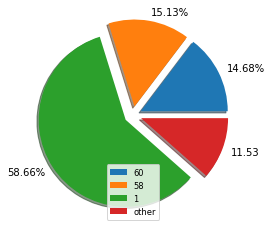

In [63]:
rowCount_segmentation_per_day()

In [64]:
#Ponowne wczytanie bazy, usunięcie duplikatów oraz usunięcie kolumny 'dataStream'

In [65]:
df4 = pd.read_csv("BCL_TaskCreation.csv", delimiter=";")
df4.drop_duplicates(keep = 'first', inplace = True)
df4.drop(columns = ['dataStream'], inplace = True)

In [66]:
#Zmiana formatu kolumny 'probingTimestamp' maksymalnie do miesiąca w celu identyfikacji zależności między nimi

In [67]:
df4['probingTimestamp']=pd.to_datetime(df4['probingTimestamp'].astype(str), format='%Y/%m')
df4['probingTimestamp'] = df4['probingTimestamp'].dt.strftime('%Y/%m')
df4 = df4.sort_values('probingTimestamp')
df4

,rowCount,probingTimestamp
0,315349655,2020/01
20551,321112827,2020/01
20550,322514176,2020/01
20549,322610589,2020/01
20548,322655034,2020/01
...,...,...
159425,289700449,2020/05
159424,289700449,2020/05
159423,289700449,2020/05
159435,289700449,2020/05


In [68]:
#Stworzenie funkcji w celu wyświetlenia powtarzalności numerów 'rowCount' w ciągu jednego miesiąca

In [69]:
def rowCount_segmentation_per_month():
    import matplotlib.pyplot as plt
    all_rowCount = df4.value_counts().count()
    rowCount1 = df4.value_counts().loc[lambda x : x>=1000].count()
    rowCount2 = df4.value_counts().loc[lambda x : (x>60, x<1000)].count()
    rowCount3 = df4.value_counts().loc[lambda x : x==60].count()
    rowCount4 = df4.value_counts().loc[lambda x : x==58].count()
    rowCount5 = df4.value_counts().loc[lambda x : (x>1, x<58)].count() + df4.value_counts().loc[lambda x : x==59].count()
    rowCount6 = df4.value_counts().loc[lambda x : x==1].count()
    other = rowCount1 + rowCount2 + rowCount4
    
    print("Top 5 najczęsciej występujących numerów 'rowCount' w ciągu miesiąca: \n"+ str(df4.value_counts().head(5)) + 
          "\nIlość numerów 'rowCount' występujących w ciągu miesiąca w przedziale 1000+: " + str(rowCount1) +
          "\nIlość numerów 'rowCount' występujących w ciągu miesiąca w przedziale (60-1000): " + str(rowCount2) +
          "\nIlość numerów 'rowCount' występujących w ciągu miesiąca 60 razy: " + str(rowCount3) +
          "\nIlość numerów 'rowCount' występujących w ciągu miesiąca 58 razy: " + str(rowCount4) +
          "\nIlość numerów 'rowCount' występujących w ciągu miesiąca w przedziale (1-58) oraz 59: " + str(rowCount5) +
          "\nIlość numerów 'rowCount' występujacych w ciągu miesiąca tylko raz: " + str(rowCount6)) 
    
    lb1 = round(rowCount3 / all_rowCount * 100, 2)
    lb2 = round(rowCount4 / all_rowCount * 100, 2)
    lb3 = round(rowCount6 / all_rowCount * 100, 2)
    lb4 = round(other / all_rowCount * 100, 2)
    
    
    labels = [str(lb1) + "%",str(lb2) + "%",str(lb3) + "%",str(lb4)]
    values = [rowCount3, rowCount4, rowCount6, other]
    plt.pie(values, labels=labels, shadow = True, explode = (0.1, 0.1, 0.1, 0.1))
    plt.legend(['60','58','1','other'], loc='lower center', fontsize='small')
    plt.show()

In [70]:
#Dwa najczęściej występujące numery 'rowCount' pojawiły się w styczniu. 
#Największa ilość numerów 'rowCount' występuje jednego miesiąca tylko raz (58.12%)

Top 5 najczęsciej występujących numerów 'rowCount' w ciągu miesiąca: 
rowCount   probingTimestamp
318665910  2020/01             3951
317651677  2020/01             2831
285498466  2020/03             1380
325841983  2020/02             1337
289503125  2020/04              520
dtype: int64
Ilość numerów 'rowCount' występujących w ciągu miesiąca w przedziale 1000+: 4
Ilość numerów 'rowCount' występujących w ciągu miesiąca w przedziale (60-1000): 52
Ilość numerów 'rowCount' występujących w ciągu miesiąca 60 razy: 1031
Ilość numerów 'rowCount' występujących w ciągu miesiąca 58 razy: 1069
Ilość numerów 'rowCount' występujących w ciągu miesiąca w przedziale (1-58) oraz 59: 615
Ilość numerów 'rowCount' występujacych w ciągu miesiąca tylko raz: 3845


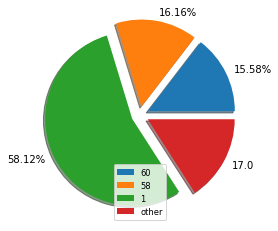

In [71]:
rowCount_segmentation_per_month()

# Problem 1- Funkcja

In [72]:
def problem_1(df):
    if len(df.columns)<3:
        print("Zaimportowana została jedna kolumna. Jeżeli powinno być inaczej, sprawdź delimiter przy importowaniu")
    else:
        print("Liczba kolumn: " + str(len(df.columns)))
    

# Problem 2- Funkcja

In [73]:
def problem_2(df):
    if 'probingTimestamp' in df.columns:
        if df['probingTimestamp'].dtypes == 'datetime64[ns]':
            print("Kolumna 'probingTimestamp' ma poprawny typ daty('datetime64[ns]')")
        else:
            print("Kolumna 'probingTimestamp' powinna mieć typ danych: data\nSprawdź parse_dates przy importowaniu")
    else:
        print("Brak kolumny 'probingTimestamp'")

# Problem 3- Funkcja

In [74]:
def problem_3(df):
    for columns in df.columns:
        if df[columns].nunique() == 1:
            print("Wartość w kolumnie '" + columns + "' jest jednakowa dla wszystkich wierszy \nW celu optymalizacji można usunąć kolumnę komendą: \ndf.drop(columns = ['" + columns + "'], inplace = True)\n")
        else:
            print("Kolumna '" + columns + "' posiada " + str(df[columns].nunique()) + " unikalnych wartości")   

# Problem 4- Funkcja 

In [75]:
def problem_4(df):
    if df.duplicated().sum() > 0:
        print(df[df.duplicated(keep = 'first')])
        print("Baza danych posiada " + str(df.duplicated().sum()) + " duplikaty\nW celu pozbycia się duplikatów użyj komendy:\ndf.drop_duplicates(keep = 'first', inplace = True)")
    else:
        print("Baza danych nie posiada duplikatów")

In [76]:
#Sprawdzenie funkcji. Wczytanie bazy

In [77]:
df = pd.read_csv('BCL_TaskCreation.csv')

In [78]:
problem_1(df)

Zaimportowana została jedna kolumna. Jeżeli powinno być inaczej, sprawdź delimiter przy importowaniu


In [79]:
#Wczytanie bazy z delimiterem

In [80]:
df = pd.read_csv("BCL_TaskCreation.csv", delimiter=";")

In [81]:
#Ponowne sprawdzenie problemu 1

In [82]:
problem_1(df)

Liczba kolumn: 3


In [83]:
problem_2(df)

Kolumna 'probingTimestamp' powinna mieć typ danych: data
Sprawdź parse_dates przy importowaniu


In [84]:
#Wczytanie bazy z parse_dates

In [85]:
df = pd.read_csv('BCL_TaskCreation.csv', delimiter = ';',parse_dates = ['probingTimestamp'])

In [86]:
#Ponowne sprawdzenie problemu 2

In [87]:
problem_2(df)

Kolumna 'probingTimestamp' ma poprawny typ daty('datetime64[ns]')


In [88]:
problem_3(df)

Wartość w kolumnie 'dataStream' jest jednakowa dla wszystkich wierszy 
W celu optymalizacji można usunąć kolumnę komendą: 
df.drop(columns = ['dataStream'], inplace = True)

Kolumna 'rowCount' posiada 6612 unikalnych wartości
Kolumna 'probingTimestamp' posiada 160513 unikalnych wartości


In [89]:
#Usunięcie kolumny 'dataStream'

In [90]:
df.drop(columns = ['dataStream'], inplace = True)

In [91]:
#Ponowne sprawdzenie problemu 3

In [92]:
problem_3(df)

Kolumna 'rowCount' posiada 6612 unikalnych wartości
Kolumna 'probingTimestamp' posiada 160513 unikalnych wartości


In [93]:
problem_4(df)

         rowCount        probingTimestamp
8733    317606524 2020-01-16 12:26:01.040
8947    317582568 2020-01-16 11:19:00.257
20515   320921727 2020-01-23 13:08:01.017
37395   326576573 2020-02-05 07:46:00.163
37568   326964763 2020-02-05 20:00:00.133
...           ...                     ...
156341  289690106 2020-04-29 08:02:00.363
156948  289692753 2020-04-29 16:02:00.187
157612  289694331 2020-04-30 00:01:00.480
157947  289695919 2020-04-30 12:01:00.320
160541  289702842 2020-05-02 04:02:00.040

[222 rows x 2 columns]
Baza danych posiada 222 duplikaty
W celu pozbycia się duplikatów użyj komendy:
df.drop_duplicates(keep = 'first', inplace = True)


In [94]:
#Usunięcie duplikatów

In [95]:
df.drop_duplicates(keep = 'first', inplace = True)

In [96]:
#Ponowne sprawdzenie problemu 4

In [97]:
problem_4(df)

Baza danych nie posiada duplikatów
